# $\rho'$ analysis notes

## Data Acqusition

### Run numbers

### Lego Train

### Data scheme

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as ps
import awkward

class UPCFiles:
    ccup8_2015 =  r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2015/pvn/ccup8.sel.new.root"
    ccup9_2015 =  r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2015/pvn/ccup9.sel.new.root"
    ccup29_2018 = r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2018/pvn/ccup29.sel.new.root"
    ccup30_2018 = r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2018/pvn/ccup30.sel.new.root"
    ccup31_2018 = r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2018/pvn/ccup31.sel.new.root"
    
    ccup8_2015_win  =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2015\pvn\ccup8.sel.new.root"
    ccup9_2015_win  =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2015\pvn\ccup9.sel.new.root"
    ccup29_2018_win =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2018\pvn\ccup29.sel.new.root"
    ccup30_2018_win =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2018\pvn\ccup30.sel.new.root"
    ccup31_2018_win =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2018\pvn\ccup31.sel.new.root"
    
    ccup9_2015_my = r"D:\GoogleDrive\Job\cern\Alice\analysis\dev\grid\selection\RhoPrime\macro\AnalysisResults.root"

events = uproot.open(UPCFiles.ccup9_2015_win)['events']
entries = events.numentries
events.show()
events.name, events.title, events.numentries

dV0                        (no streamer)              asdtype("('>f4', (6,))")
EnZDC                      (no streamer)              asdtype("('>f4', (6,))")
dAD                        (no streamer)              asdtype("('>f4', (6,))")
vertex                     (no streamer)              asdtype("('>f4', (3,))")
nTracks                    (no streamer)              asdtype('>i4')
nTracklets                 (no streamer)              asdtype('>i4')
eventinfo                  (no streamer)              asdtype("('>i4', (4,))")
TDCa                       (no streamer)              asdtype("('>f4', (4,))")
TDCc                       (no streamer)              asdtype("('>f4', (4,))")
TriggerType                (no streamer)              asdtype("('>i4', (2,))")
dca0                       (no streamer)              asdtype("('>f4', (177,))")
dca1                       (no streamer)              asdtype("('>f4', (177,))")
ITSNcls                    (no streamer)              asdtype("('>i4

(b'events', b'events', 1135259)

## Four prongs selection


In [114]:
start = 0
stop  = 300000
itsl0 = events.array("HasPointOnITSLayer0", entrystart=start, entrystop=stop)
itsl1 = events.array("HasPointOnITSLayer1", entrystart=start, entrystop=stop)
tpcref = events.array("StatusAndTPCRefit", entrystart=start, entrystop=stop)
itcref = events.array("StatusAndITSRefit", entrystart=start, entrystop=stop)
dca0 = events.array("dca0", entrystart=start, entrystop=stop)
dca1 = events.array("dca1", entrystart=start, entrystop=stop)
tpcncls = events.array("TPCNcls", entrystart=start, entrystop=stop)
sigmtpcpion = events.array("NumberOfSigmasTPCPion", entrystart=start, entrystop=stop)
pt = events.array("Pt", entrystart=start, entrystop=stop)
px = events.array("Px", entrystart=start, entrystop=stop)
py = events.array("Py", entrystart=start, entrystop=stop)
pz = events.array("Pz", entrystart=start, entrystop=stop)
q = events.array("charge", entrystart=start, entrystop=stop)
entries = len(q)
# TODO: why tpcref freq value is 64?
select = ((itsl0 == 1) + (itsl1 == 1)) * (tpcref > 0) * (itcref > 0) * ((np.abs(dca0) < 3) + (np.abs(dca1) < 3)) * (tpcncls > 50) * (np.abs(sigmtpcpion) < 3)

GoodEvents = np.argwhere(np.sum(select,axis=1)==4)
GoodTracks = np.argwhere(select[GoodEvents.flatten()]==True).reshape(len(GoodEvents),8)
GoodEventsAndTracks = np.append(GoodEvents,GoodTracks[:,1:len(GoodTracks):2], axis=1) # array([[ 389,    2,    3,    5,    7],...])
GoodEventsNumber = GoodEventsAndTracks[:,0]
GoodTracksNum = GoodEventsAndTracks[:,1:]
print(f'Numer of events with 4pr: {len(GoodEventsNumber)}')

Numer of events with 4pr: 4220


Transversal momentum distribution for ccup9 trigger:

<ipython-input-115-d64eafff2e64>:13: RuntimeWarning: divide by zero encountered in floor_divide
  ax.errorbar(bins[:-1],counts, 10 * counts // counts,fmt='o', color='black',label=f'Entries {np.sum(counts)}')


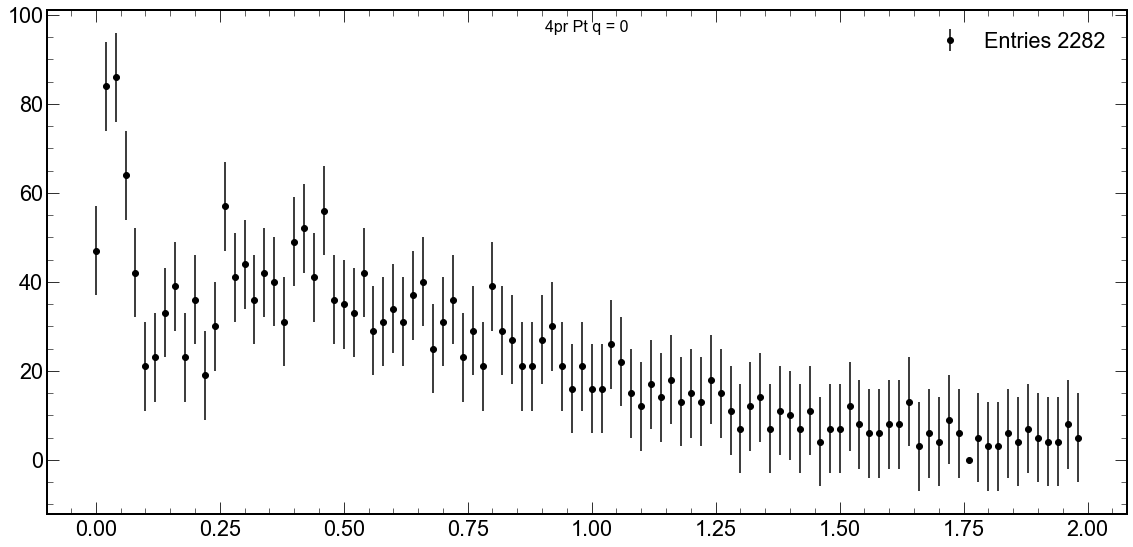

In [115]:
pxg = px[GoodEventsNumber][select[np.sum(select,axis=1)==4,:]].reshape(len(GoodEventsNumber),4)
pyg = py[GoodEventsNumber][select[np.sum(select,axis=1)==4,:]].reshape(len(GoodEventsNumber),4)
pzg = pz[GoodEventsNumber][select[np.sum(select,axis=1)==4,:]].reshape(len(GoodEventsNumber),4)

goodCharges = q[GoodEventsNumber][select[np.sum(select,axis=1)==4,:]].reshape(len(GoodEventsNumber),4)
goodChargesEventNumbers = np.argwhere(np.sum(goodCharges,axis=1)==0)
ptMy = np.sqrt(np.sum(np.add(np.sum(pxg[goodChargesEventNumbers], axis=2)**2, np.sum(pyg[goodChargesEventNumbers], axis=2)**2),axis=1))
counts, bins = np.histogram(ptMy,bins=100, range=(0,2))
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('4pr Pt q = 0', fontsize=16)
plt.style.use(hep.style.ROOT)
ax.errorbar(bins[:-1],counts, 10 * counts // counts,fmt='o', color='black',label=f'Entries {np.sum(counts)}')

ax.legend()


## Mass

<ipython-input-116-40b2d914db2e>:24: RuntimeWarning: divide by zero encountered in floor_divide
  ax.errorbar(bins[:-1],counts, 30 * counts // counts,fmt='o', color='black',label=f'Entries {np.sum(counts)}')


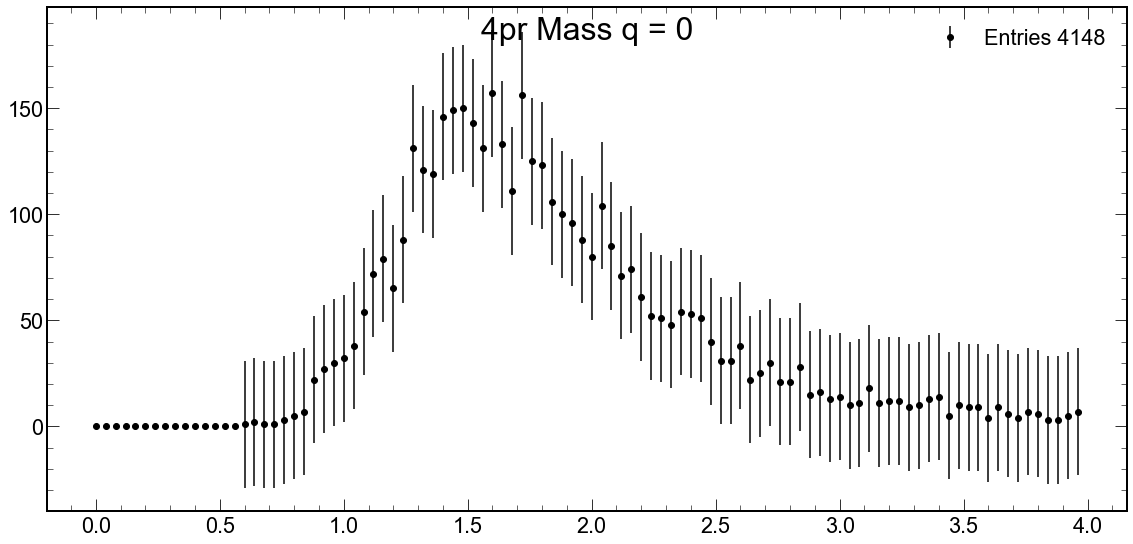

In [116]:
massPion = np.full(pxg.shape[0], 0.140)

# float esum = sqrt( (trk[0]->Px())*trk[0]->Px() + (trk[0]->Py())*trk[0]->Py() +(trk[0]->Pz())*trk[0]->Pz() + partmass*partmass);
# esum = esum + sqrt( (trk[1]->Px())*trk[1]->Px() + (trk[1]->Py())*trk[1]->Py() +(trk[1]->Pz())*trk[1]->Pz() + partmass*partmass);
# float amass = sqrt( esum*esum - pxsum*pxsum - pysum*pysum - pzsum*pzsum );


Energy0 = np.sqrt(massPion**2 + pxg[:,0]**2 + pyg[:,0]**2 + pzg[:,0]**2)
Energy1 = np.sqrt(massPion**2 + pxg[:,1]**2 + pyg[:,1]**2 + pzg[:,1]**2)
Energy2 = np.sqrt(massPion**2 + pxg[:,2]**2 + pyg[:,2]**2 + pzg[:,2]**2)
Energy3 = np.sqrt(massPion**2 + pxg[:,3]**2 + pyg[:,3]**2 + pzg[:,3]**2)

Energy = Energy0 + Energy1 + Energy2 + Energy3

Mass = np.sqrt(Energy**2 - np.sum(pxg,axis=1)**2 - np.sum(pyg,axis=1)**2 - np.sum(pzg,axis=1)**2)



counts, bins = np.histogram(Mass,bins=100, range=(0,4))
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('4pr Mass q = 0', fontsize=32)
plt.style.use(hep.style.ROOT)
ax.errorbar(bins[:-1],counts, 30 * counts // counts,fmt='o', color='black',label=f'Entries {np.sum(counts)}')

ax.legend()


## DRAFTS

float32
(1135258, 6)


(array([2.18910e+05, 2.94824e+05, 2.48520e+05, 1.65558e+05, 9.72170e+04,
        5.20170e+04, 2.60990e+04, 1.25340e+04, 6.23400e+03, 3.04300e+03,
        1.69100e+03, 9.84000e+02, 6.94000e+02, 4.28000e+02, 3.49000e+02,
        3.50000e+02, 2.49000e+02, 2.14000e+02, 2.44000e+02, 2.31000e+02,
        1.85000e+02, 1.84000e+02, 2.04000e+02, 2.05000e+02, 1.81000e+02,
        1.41000e+02, 1.86000e+02, 1.93000e+02, 1.82000e+02, 2.02000e+02,
        2.51000e+02, 2.75400e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32.], dtype=float32),
 <a list of 1 Patch objects>)

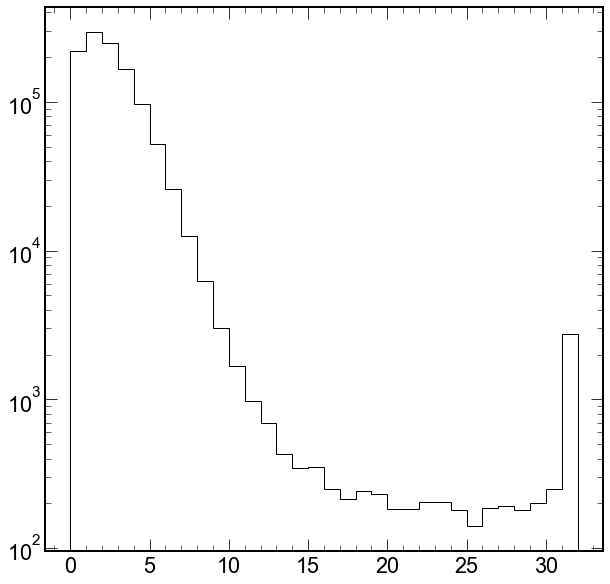

In [155]:
#  if( fAODVZero ) {
#     for(Int_t iv0=0; iv0<64; iv0++) {
#       if( fAODVZero->GetBBFlag(iv0) == 1 && iv0 < 32 ) nbbc++;
#       if( fAODVZero->GetBBFlag(iv0) == 1 && iv0 > 31 ) nbba++;
#       if( fAODVZero->GetBBFlag(iv0) != 1 && fAODVZero->GetBBFlag(iv0) != 0 ) std::cout<<"ogogo"<<std::endl;
#     }

#     dV0[0]=nbba;
#     dV0[1]=nbbc;
#     dV0[2]=fAODVZero->GetV0ADecision();
#     dV0[3]=fAODVZero->GetV0CDecision();
#     dV0[4]=fAODVZero->GetNbPMV0A();
#     dV0[5]=fAODVZero->GetNbPMV0C();

start = 0
stop  = -1
dv0 = events.array("dV0", entrystart=start, entrystop=stop)
print(dv0.dtype)
print(dv0.shape)

n = 5
counts, bins = np.histogram(dv0[:,n],bins=32, range=(0,32))
plt.style.use(hep.style.ROOT)
plt.hist(dv0[:,n], bins=bins, log=True, histtype='step', color='black')

In [8]:
nTrack = 7
allData = np.concatenate(
    (
        px[:,nTrack].reshape(entries,1),
        py[:,nTrack].reshape(entries,1),
        pz[:,nTrack].reshape(entries,1), 
        itsl0[:,nTrack].reshape(entries,1),
        itsl1[:,nTrack].reshape(entries,1),
        tpcref[:,nTrack].reshape(entries,1),
        itcref[:,nTrack].reshape(entries,1),
        dca0[:,nTrack].reshape(entries,1),
        dca1[:,nTrack].reshape(entries,1),
        tpcncls[:,nTrack].reshape(entries,1),
        sigmtpcpion[:,nTrack].reshape(entries,1)
   ),
    axis=1)
#df = ps.DataFrame(allData, columns=['px', 'py', 'pz', 'itsl0', 'itsl1', 'tpcref', 'itcref', 'dca0', 'dca1', 'tpcncls', 'sigmtpcpion' ])

#df[(df.itsl1 == 1) * (df.itsl0 == 1) * (df.tpcref > 0) * (df.itcref > 0) * ((np.abs(df.dca0) < 3) + (np.abs(df.dca1) < 3)) * (df.tpcncls > 50) * (np.abs(df.sigmtpcpion) < 3)]



In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as ps
import awkward

ccup9_2015_my = r"D:\GoogleDrive\Job\cern\Alice\analysis\dev\grid\selection\RhoPrime\macro\AnalysisResults.root"

events = uproot.open(ccup9_2015_my)['RhoPrimeCentral/events']
entries = events.numentries
events.show()
print(events.name, events.title, events.numentries)

nTracks = events.array('nTracks')


RunNum                     (no streamer)              asdtype('>i4')
PeriodNumber               (no streamer)              asdtype('>u4')
OrbitNumber                (no streamer)              asdtype('>u4')
BunchCrossNumber           (no streamer)              asdtype('>u2')
Mass                       (no streamer)              asdtype('>f4')
Pt                         (no streamer)              asdtype('>f4')
Q                          (no streamer)              asdtype('>i2')
Rapidity                   (no streamer)              asdtype('>f4')
Phi                        (no streamer)              asdtype('>f4')
ZNAenergy                  (no streamer)              asdtype('>f4')
ZNCenergy                  (no streamer)              asdtype('>f4')
ZPAenergy                  (no streamer)              asdtype('>f4')
ZPCenergy                  (no streamer)              asdtype('>f4')
VtxX                       (no streamer)              asdtype('>f4')
VtxY                       (no str

In [6]:
# data from debug output 
# Tracks in events:
# tracksNumbers = [24, 1170, 3793, 0, 13, 51]
mycache = uproot.ArrayCache(1024*1024 * 10)

data = events.arrays('*', namedecode="utf-8")



events.keys()

[b'RunNum',
 b'PeriodNumber',
 b'OrbitNumber',
 b'BunchCrossNumber',
 b'Mass',
 b'Pt',
 b'Q',
 b'Rapidity',
 b'Phi',
 b'ZNAenergy',
 b'ZNCenergy',
 b'ZPAenergy',
 b'ZPCenergy',
 b'VtxX',
 b'VtxY',
 b'VtxZ',
 b'VtxContrib',
 b'VtxChi2',
 b'VtxNDF',
 b'SpdVtxX',
 b'SpdVtxY',
 b'SpdVtxZ',
 b'SpdVtxContrib',
 b'V0Adecision',
 b'V0Cdecision',
 b'ADAdecision',
 b'ADCdecision',
 b'UBAfired',
 b'UBCfired',
 b'VBAfired',
 b'VBCfired',
 b'Ntracklets',
 b'nTracks',
 b'IsCUP2',
 b'IsCUP4',
 b'IsCUP9',
 b'IsC1ZED',
 b'PIDTPCPion',
 b'PIDTPCElectron',
 b'TPCsignal',
 b'TrackP',
 b'TrackEta',
 b'TrackPhi',
 b'TrackPx',
 b'TrackPy',
 b'TrackPz',
 b'TrackQ',
 b'TrackHasPointOnITSLayer0',
 b'TrackHasPointOnITSLayer1',
 b'TrackITSModuleInner',
 b'TrackITSModuleOuter']

(array([  0.,   0.,   0.,   0.,  83.,  67.,  91.,  61.,  77.,  79.,  73.,
         92.,  70.,  69.,  64.,  74.,  54.,  65.,  60.,  53.,  44.,  37.,
         48.,  46.,  38.,  39.,  31.,  30.,  24.,  15.,  25.,  15.,  14.,
         17.,   8.,  16.,  10.,  12.,   5.,   9.,   4.,   7.,   8.,   2.,
          3.,   4.,   5.,   7.,   6.,   5.,   2.,   2.,   4.,   3.,   5.,
          5.,   3.,   2.,   3.,   2.,   2.,   3.,   3.,   4.,   1.,   3.,
          6.,   1.,   0.,   5.,   1.,   3.,   3.,   5.,   1.,   3.,   4.,
          2.,   3.,   3.,   4.,   1.,   4.,   0.,   4.,   4.,   4.,   3.,
          0.,   2.,   0.,   2.,   1.,   1.,   0.,   0.,   3.,   3.,   0.,
          3.,   3.,   4.,   4.,   3.,   0.,   4.,   1.,   3.,   1.,   0.,
          3.,   2.,   2.,   1.,   2.,   2.,   1.,   0.,   1.,   0.,   0.,
          1.,   1.,   0.,   0.,   1.,   5.,   2.,   0.,   1.,   1.,   1.,
          1.,   0.,   4.,   4.,   2.,   0.,   0.,   3.,   3.,   1.,   2.,
          0.,   1.,   1.,   5.,   3., 

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


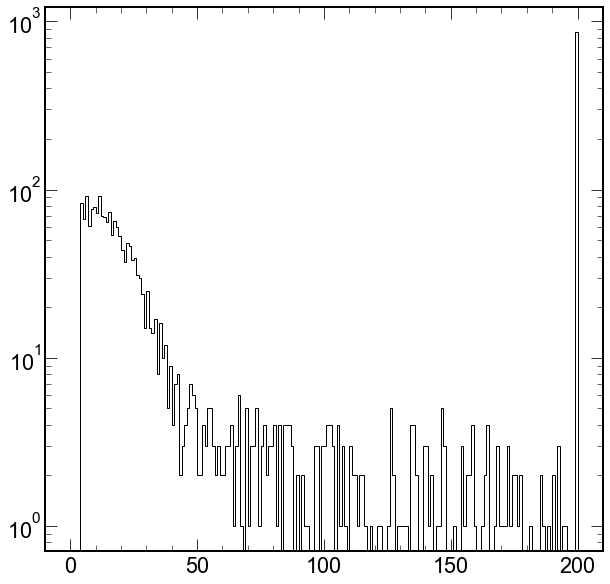

In [5]:
nTracks = events.array("nTracks")

counts, bins = np.histogram(nTracks,bins=200, range=(0,200))
plt.style.use(hep.style.ROOT)
plt.hist(nTracks, bins=bins, histtype='step', color='black', log=True)

In [28]:
select = data['IsCUP9']# ((data['TrackHasPointOnITSLayer0'] == 1) + (data['TrackHasPointOnITSLayer1'] == 1)) * (tpcref > 0) * (itcref > 0) * ((np.abs(dca0) < 3) + (np.abs(dca1) < 3)) * (tpcncls > 50) * (np.abs(sigmtpcpion) < 3)
select = ((data['TrackHasPointOnITSLayer0'] == 1) + (data['TrackHasPointOnITSLayer1'] == 1))
GoodEvents = np.argwhere(select.sum()==4)
GoodTracks = np.argwhere(select[GoodEvents]==True).reshape(len(GoodEvents),8)
GoodEventsAndTracks = np.append(GoodEvents,GoodTracks[:,1:len(GoodTracks):2], axis=1) # array([[ 389,    2,    3,    5,    7],...])
GoodEventsNumber = GoodEventsAndTracks[:,0]
GoodTracksNum = GoodEventsAndTracks[:,1:]
print(f'Numer of events with 4pr: {len(GoodEventsNumber)}')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [67]:
select[GoodEvents][0]

<JaggedArray [[False True True ... False False False]] at 0x02a80db06c70>